In [32]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
filenames = ["logs-53865-iid18-5epoch200rounds-22hrs-1in5.csv", \
  "logs-10679-noniid18-5epoch200rounds-5hours.csv", \
  "../../node1/CS744-proj/logs-54374-iid34-5epoch200rounds-1in5.csv", \
  "../../node1/CS744-proj/logs-10444-noniid34-5epoch200rounds-5hour-1in5.csv", \
  # "../../node2/CS744-proj/logs-97120.csv", \
  # "../../node2/CS744-proj/logs-5151-noniid50-5epcoh200rounds-1in5.csv", \
]
labels = ["IID ResNet-18", "Non-IID ResNet-18", \
  "IID ResNet-34", "Non-IID ResNet-34", \
  # "IID ResNet-50", "Non-IID ResNet-50", \
]

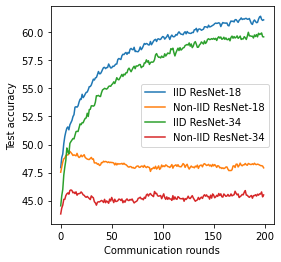

In [59]:
plt.figure(figsize=(4, 4))
for i in range(len(filenames)):
  filename = filenames[i]
  label = labels[i]
  df = pd.read_csv(filename)
  df.columns = ['acc', 'loss', 'time', '_tmp']
  acc = df.acc.transform(lambda x: x[:-1].split('(')[1]).astype(float).tolist()
  loss = df.loss.tolist()
  rounds = list(range(0, 200))
  plt.plot(rounds, acc, label=label)
plt.xlabel("Communication rounds")
plt.ylabel("Test accuracy")
plt.legend()
plt.savefig("acc.png")

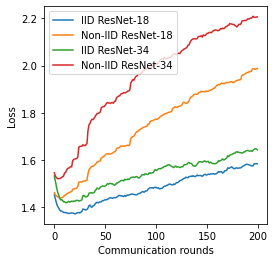

In [60]:
plt.figure(figsize=(4, 4))
for i in range(len(filenames)):
  filename = filenames[i]
  label = labels[i]
  df = pd.read_csv(filename)
  df.columns = ['acc', 'loss', 'time', '_tmp']
  acc = df.acc.transform(lambda x: x[:-1].split('(')[1]).astype(float).tolist()
  loss = df.loss.tolist()
  rounds = list(range(0, 200))
  plt.plot(rounds, loss, label=label)
plt.xlabel("Communication rounds")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss.png")

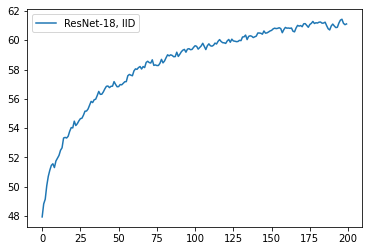

In [2]:
pkl_filename = "weights-10679.pkl"
with open(pkl_filename, "rb") as f:
  weights = pickle.load(f)

/users/cksteven/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(weights)

41

In [42]:
last_weight = weights[-1]
last_weight = list(last_weight.values())

In [37]:
first_weight = weights[0]
first_weight = list(first_weight.values())

In [ ]:
first_weight

In [22]:
first_weight[0].shape

torch.Size([64, 3, 7, 7])

In [34]:
np.linalg.norm(first_weight[0].flatten(), ord=2)

2.7187748

In [33]:
np.linalg.norm(first_weight[0])

2.7187748

In [32]:
np.linalg.norm(first_weight[0].flatten())

2.7187748

In [43]:
weight1 = np.concatenate([x.flatten() for x in first_weight])
weight1.shape

(11191262,)

In [44]:
weight2 = np.concatenate([x.flatten() for x in last_weight])
weight2.shape

(11191262,)

(weight1 - weight2) / weight2

In [46]:
np.linalg.norm(weight1 - weight2)

19158.632883486975

In [47]:
np.linalg.norm(weight2)

30339.252353598982

In [48]:
np.linalg.norm(weight1 - weight2) / np.linalg.norm(weight2)

0.6314800595675948

In [ ]:
np.linalg.norm(weight1 - weight2) / np.linalg.norm(weight2)

In [52]:
divergences = []
for idx in range(len(weights)):
  print(idx)
  weight1 = np.concatenate([x.flatten() for x in list(weights[idx].values())])
  divergence = np.linalg.norm(weight1 - weight2) / np.linalg.norm(weight2)
  divergences.append(divergence)
divergences

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


[0.6314800595675948,
 0.6289741826228457,
 0.6104012250421754,
 0.5909438469845735,
 0.5807729467721046,
 0.5654428944929337,
 0.548638800502448,
 0.5448062883111938,
 0.5165046591682164,
 0.500142781412573,
 0.48466532941795093,
 0.4619650673686157,
 0.4572481298182651,
 0.44516097669367705,
 0.42629322658911667,
 0.41833339390332763,
 0.39091619458408644,
 0.3662996776160029,
 0.34890597065954937,
 0.33740843551804345,
 0.31087566318782295,
 0.2989359157349073,
 0.2825740395768909,
 0.27092910051511704,
 0.2609056084988166,
 0.2389423688989438,
 0.2289188770595757,
 0.21196738343186744,
 0.1811598885319567,
 0.17275784456628301,
 0.15831222480418047,
 0.14504583854692712,
 0.12632549507416563,
 0.1073103436251876,
 0.0947809782715783,
 0.0826938280729746,
 0.07208071766020885,
 0.0635312648760514,
 0.03522964831004305,
 0.021521051533950702,
 0.0]